In [1]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator()

train_it = datagen.flow_from_directory('training_data/', class_mode='categorical',target_size=(28, 28),color_mode='grayscale',batch_size=32,shuffle=True,seed=0)
test_it =  datagen.flow_from_directory('testing_data/', class_mode='categorical',target_size=(28, 28),color_mode='grayscale', batch_size=32,shuffle=True,seed=0)
# confirm the iterator works
batchX, batchy = train_it.next()

batchX_test, batchy_test = test_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 4641 images belonging to 9 classes.
Found 516 images belonging to 9 classes.
Batch shape=(32, 28, 28, 1), min=0.000, max=249.000


In [2]:
import tensorflow as tf
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Reshaping the array to 4-dims so that it can work with the Keras API
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
#x_train /= 255
#x_test /= 255
#??flow_from_directory

[0. 0. 1. 0. 0. 0. 0. 0. 0.]


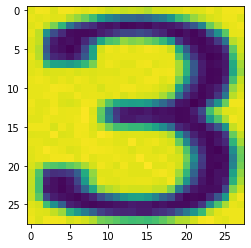

In [3]:
plt.imshow(batchX[12])
print(batchy[12])

In [ ]:
# Creating a Sequential Model and adding the layers

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(9, activation='softmax'))

In [4]:
model = Sequential([
    Conv2D(16, 3, 
           padding='same',
           activation='relu',
           kernel_regularizer=regularizers.l2(0.0001),
           input_shape=(28, 28 , 1)),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(
        100,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.0001)
    ),
    Dropout(0.2),
    Dense(9, activation='softmax')
])

In [5]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(train_it,epochs=100,shuffle=False)

Epoch 1/100
146/146 [==============================] - 15s 100ms/step - loss: 18.6545 - accuracy: 0.2720
Epoch 2/100
146/146 [==============================] - 15s 105ms/step - loss: 1.2154 - accuracy: 0.6063
Epoch 3/100
146/146 [==============================] - 15s 102ms/step - loss: 0.7698 - accuracy: 0.7337
Epoch 4/100
146/146 [==============================] - 16s 110ms/step - loss: 0.6004 - accuracy: 0.7766
Epoch 5/100
146/146 [==============================] - 15s 101ms/step - loss: 0.4970 - accuracy: 0.8213
Epoch 6/100
146/146 [==============================] - 14s 93ms/step - loss: 0.3895 - accuracy: 0.8618
Epoch 7/100
146/146 [==============================] - 14s 96ms/step - loss: 0.4327 - accuracy: 0.8473
Epoch 8/100
146/146 [==============================] - 14s 94ms/step - loss: 0.3587 - accuracy: 0.8678
Epoch 9/100
146/146 [==============================] - 14s 95ms/step - loss: 0.2577 - accuracy: 0.9261
Epoch 10/100
146/146 [==============================] - 13s 90ms/st

146/146 [==============================] - 14s 96ms/step - loss: 0.0387 - accuracy: 0.9952
Epoch 80/100
146/146 [==============================] - 14s 92ms/step - loss: 0.0489 - accuracy: 0.9958
Epoch 81/100
146/146 [==============================] - 14s 93ms/step - loss: 0.0528 - accuracy: 0.9906
Epoch 82/100
146/146 [==============================] - 14s 93ms/step - loss: 0.0587 - accuracy: 0.9907
Epoch 83/100
146/146 [==============================] - 13s 89ms/step - loss: 0.0604 - accuracy: 0.9928
Epoch 84/100
146/146 [==============================] - 14s 93ms/step - loss: 0.0430 - accuracy: 0.9957
Epoch 85/100
146/146 [==============================] - 15s 102ms/step - loss: 0.0397 - accuracy: 0.9954
Epoch 86/100
146/146 [==============================] - 15s 105ms/step - loss: 0.0465 - accuracy: 0.9929
Epoch 87/100
146/146 [==============================] - 13s 86ms/step - loss: 0.0353 - accuracy: 0.9971
Epoch 88/100
146/146 [==============================] - 14s 95ms/step - los

In [6]:
model.evaluate(test_it)


17/17 [==============================] - 1s 32ms/step - loss: 0.0578 - accuracy: 0.9942


[0.05775518715381622, 0.9941860437393188]

(28, 28, 1)
(1, 28, 28, 1)


array([[5.1473631e-13, 3.1279470e-07, 5.0306721e-07, 6.4281544e-08,
        1.0203481e-08, 1.3137275e-06, 3.2471488e-18, 9.9998331e-01,
        1.4372503e-05]], dtype=float32)

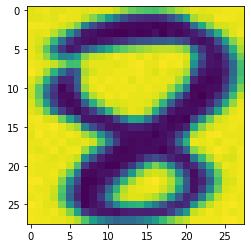

In [8]:
plt.imshow(batchX_test[1])
print(batchX_test[1].shape)
y = batchX_test[1].reshape(1,28,28,1)
print(y.shape)
#batchX_test[1]=batchX_test[1].reshape(1,28,28,1)
model.predict(y)

In [9]:


model.save("epoch100_white_28.h5")

In [ ]:
??datagen.flow_from_directory

In [ ]:
#model = keras.models.load_model('big_epoch_dhruv.h5')

In [10]:
import cv2
img=cv2.imread('Debug/Numbers/grid_88.png',0)

(27, 17)


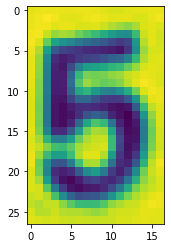

In [11]:
plt.imshow(img)
print(img.shape)

(28, 28)


array([[1.5375952e-14, 1.3900867e-15, 1.9742715e-16, 8.7600105e-09,
        6.2936047e-06, 9.9999368e-01, 1.5566376e-17, 6.5272462e-12,
        3.3790389e-08]], dtype=float32)

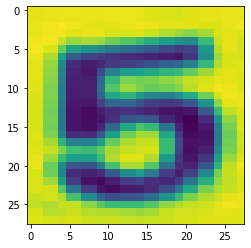

In [12]:
img = cv2.resize(img, (28, 28),interpolation = cv2.INTER_NEAREST)
print(img.shape)
plt.imshow(img)
img=img.reshape(1,28,28,1)
model.predict(img)